# Heart Failure Prediction
12 clinical features for predicting death events.

Source: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

warnings.filterwarnings('ignore')
%matplotlib inline

# ▶  Data Import

In [8]:
df = pd.read_csv('D:\GitHub Repos\Heart-Failure-Prediction\heart_failure_clinical_records_dataset.csv')

In [9]:
# What is the shape of the data?
df.shape

(299, 13)

Here we can see we have 13 features and 299 observations.

In [10]:
# Quick look at the first 20 rows of the data.
df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


We can see with this command that all variables are numeric and the dataset contains NO null/missing values.

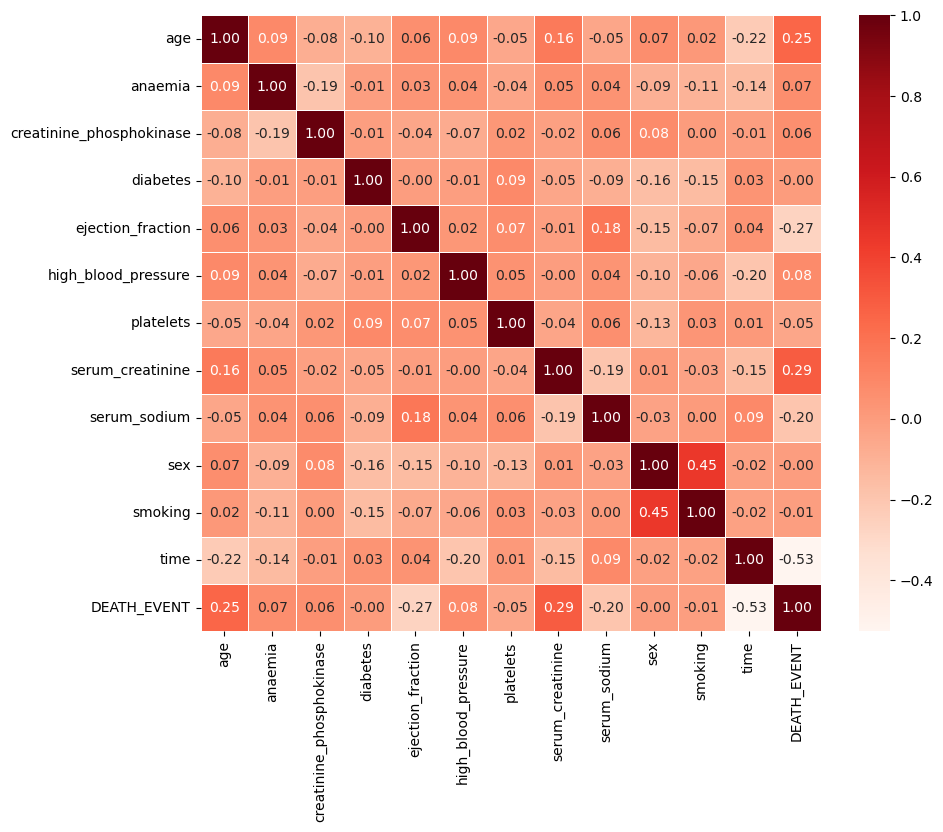

In [12]:
# Create a heatmap to visualize the correlation between the features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, linewidth=.5, cmap='Reds', fmt='.2f');

In [13]:
# Get all column names
all_columns = df.columns.tolist()

# List of all column names except target variable
feature_names = [col for col in all_columns if col != 'DEATH_EVENT']

# List containing only SALE_PRC
target_name = ['DEATH_EVENT']

In [14]:
# Creating features and target variables
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [15]:
# Separate numerical and categorical columns
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(f'X_Train Shape: {X_train.shape}')
print(f'X_Test shape: {X_test.shape}')
print(f'y_Train shape: {y_train.shape}')
print(f'y_Test shape: {y_test.shape}')

X_Train Shape: (239, 12)
X_Test shape: (60, 12)
y_Train shape: (239,)
y_Test shape: (60,)


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Define a dictionary of classifiers
classifiers = {
    'SGD': SGDClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(),
    'NaiveBayes': GaussianNB()
}

# Create a dictionary to store results
results = {}

# Loop through each classifier
for clf_name, clf in classifiers.items():
    # Create the pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])
    
    # Define the parameter grid
    if clf_name == 'SGD':
        param_grid = {
            'classifier__alpha': [0.0001, 0.001, 0.01],
            'classifier__max_iter': [1000, 2000,3000,5000],
            'classifier__loss': ['hinge', 'log_loss']
        }
    elif clf_name == 'LogisticRegression':
        param_grid = {
            'classifier__C': [0.1, 1, 10,15,20],
            'classifier__solver': ['liblinear', 'lbfgs']
        }
    elif clf_name == 'SVC':
        param_grid = {
            'classifier__C': [0.1, 1,5,7, 10],
            'classifier__kernel': ['rbf', 'linear']
        }
    elif clf_name == 'RandomForest':
        param_grid = {
            'classifier__n_estimators': [50,100,150, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    elif clf_name == 'NaiveBayes':
        param_grid = {}  # GaussianNB doesn't have hyperparameters to tune
    
    # Create and fit GridSearchCV
    grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Store results
    results[clf_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'best_estimator': grid_search.best_estimator_
    }
    
    print(f"\nBest parameters for {clf_name}:")
    print(results[clf_name]['best_params'])
    print(f"Best cross-validation score: {results[clf_name]['best_score']:.4f}")

# Find the best overall classifier
best_clf = max(results, key=lambda x: results[x]['best_score'])
print('\n\n!***************************************!')
print(f"Best overall classifier: {best_clf}")
print(f"Best overall score: {results[best_clf]['best_score']:.4f}")

# Use the best classifier for predictions
print('!***************************************!')
best_model = results[best_clf]['best_estimator']
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__alpha': [0.0001, 0.001, 0.01],
                         'classifier__loss': ['hinge', 'log_loss'],
                         'classifier__max_iter': [1000, 2000, 3000, 5000]},
             verbose=1)


Best parameters for SGD:
{'classifier__alpha': 0.001, 'classifier__loss': 'log_loss', 'classifier__max_iter': 1000}
Best cross-validation score: 0.8449
Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10, 15, 20],
                         'classifier__solver': ['liblinear', 'lbfgs']},
             verbose=1)


Best parameters for LogisticRegression:
{'classifier__C': 1, 'classifier__solver': 'liblinear'}
Best cross-validation score: 0.8364
Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 5, 7, 10],
                         'classifier__kernel': ['rbf', 'linear']},
             verbose=1)


Best parameters for SVC:
{'classifier__C': 1, 'classifier__kernel': 'linear'}
Best cross-validation score: 0.8241
Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__n_estimators': [50, 100, 150, 200]},
             verbose=1)


Best parameters for RandomForest:
{'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Best cross-validation score: 0.8955
Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', GaussianNB())]),
             n_jobs=-1, param_grid={}, verbose=1)


Best parameters for NaiveBayes:
{}
Best cross-validation score: 0.7824


!***************************************!
Best overall classifier: RandomForest
Best overall score: 0.8955
!***************************************!


In [19]:
print(f'The best model was ***{best_clf}*** and the features used were:\n {best_model.feature_names_in_}') 

The best model was ***RandomForest*** and the features used were:
 ['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'time']
